In [51]:
import math
import pandas as pd
from matplotlib import pyplot as plt

In [91]:
def read_in_relevant_data(parent_file_path, treatment_number):
    
    file_path = parent_file_path + str(treatment_number) + ".csv"
    df = pd.read_csv(file_path) #read in as pandas data frame
	
    audio_ellen = {
		'packetLoss': df['RIA_fractionLost_ellen'].tolist(),
		'bitrate': df['IT01A_bytesReceived_in_bits/s_ellen'].tolist(),
		'roundTripTime': df['RIA_roundTripTime_ellen'].tolist(),
		'bufferDelay': df['IT01A_jitterBufferDelay_ellen'].tolist(),
		'fec': df['IT01A_(dtx, fec)_ellen'].tolist(),
		'dtx': df['IT01A_(dtx, fec)_ellen'].tolist()}
    video_ellen = {
		'packetLoss': df['RIV_fractionLost_ellen'].tolist(),
		'bitrate': df['IT01V_bytesReceived_in_bits/s_ellen'].tolist(),
		'roundTripTime': df['RIV_roundTripTime_ellen'].tolist(), 
		'bufferDelay': df['IT01V_jitterBufferDelay_ellen'].tolist(),
		'codec': df['IT01V_codec_ellen'].tolist(),
		'width': df['IT01V_frameWidth_ellen'].tolist(),
		'expectedWidth': df['SV2_width_ellen'].tolist(),
		'height': df['IT01V_frameHeight_ellen'].tolist(),
		'expectedHeight': df['SV2_height_ellen'].tolist(),
		'frameRate': df['IT01V_framesPerSecond_ellen'].tolist(),
		'expectedFrameRate': df['SV2_framesPerSecond_ellen'].tolist()}
    audio_aadya = {
		'packetLoss': df['RIA_fractionLost_aadya'].tolist(),
		'bitrate': df['IT01A_bytesReceived_in_bits/s_aadya'].tolist(),
		'roundTripTime': df['RIA_roundTripTime_aadya'].tolist(),
		'bufferDelay': df['IT01A_jitterBufferDelay_aadya'].tolist(),
		'fec': df['IT01A_(dtx, fec)_aadya'].tolist(),
		'dtx': df['IT01A_(dtx, fec)_aadya'].tolist()}
    video_aadya = {
		'packetLoss': df['RIV_fractionLost_aadya'].tolist(),
		'bitrate': df['IT01V_bytesReceived_in_bits/s_aadya'].tolist(),
		'roundTripTime': df['RIV_roundTripTime_aadya'].tolist(), 
		'bufferDelay': df['IT01V_jitterBufferDelay_aadya'].tolist(),
		'codec': df['IT01V_codec_aadya'].tolist(),
		'width': df['IT01V_frameWidth_aadya'].tolist(),
		'expectedWidth': df['SV2_width_aadya'].tolist(),
		'height': df['IT01V_frameHeight_aadya'].tolist(),
		'expectedHeight': df['SV2_height_aadya'].tolist(),
		'frameRate': df['IT01V_framesPerSecond_aadya'].tolist(),
		'expectedFrameRate': df['SV2_framesPerSecond_aadya'].tolist()}
	
    return audio_ellen, video_ellen, audio_aadya, video_aadya


def graph_crossover(audio_ellen, video_ellen, audio_aadya, video_aadya):
	plt.figure(figsize=(13, 9))
	plot1 = plt.subplot2grid((9, 13), (0, 0), rowspan=9, colspan=6)
	plot2 = plt.subplot2grid((9, 13), (0, 7), rowspan=9, colspan=6)
	
	colours = ["forestgreen", "lime", "mediumseagreen", "aquamarine", "turquoise", "lightseagreen", "mediumturquoise","paleturquoise", "darkslategray", "teal", "darkcyan", "c", "cyan", "darkturquoise", "cadetblue", "powderblue", "lightblue"]
	col = 0
	y_translation = 0
	
	for key, val in audio_ellen.items():
		temp_vals = []
		for i in range(len(val)):
			if val[i] == -1:
				temp_vals.append(y_translation)
			else:
				temp_vals.append(y_translation + 4)
		plot1.plot(range(len(temp_vals)), temp_vals, label=key, color=colours[col])
		col += 1
		y_translation += 5

	for key, val in video_ellen.items():
		temp_vals = []
		for i in range(len(val)):
			if val[i] == -1:
				temp_vals.append(y_translation)
			else:
				temp_vals.append(y_translation + 4)
		plot1.plot(range(len(temp_vals)), temp_vals, label=key, color=colours[col])
		col += 1
		y_translation += 5

	col = 0
	y_translation = 0
	
	for key, val in audio_aadya.items():
		temp_vals = []
		for i in range(len(val)):
			if val[i] == -1:
				temp_vals.append(y_translation)
			else:
				temp_vals.append(y_translation + 4)
		plot2.plot(range(len(temp_vals)), temp_vals, label=key, color=colours[col])
		col += 1
		y_translation += 5

	for key, val in video_aadya.items():
		temp_vals = []
		for i in range(len(val)):
			if val[i] == -1:
				temp_vals.append(y_translation)
			else:
				temp_vals.append(y_translation + 4)
		plot2.plot(range(len(temp_vals)), temp_vals, label=key, color=colours[col])
		col += 1
		y_translation += 5
	
	plot1.legend()
	plot2.legend()
	plot1.set_title("Ellen's side")
	plot2.set_title("Aadya's side")
	plot1.set_yticklabels([])
	plot2.set_yticklabels([])
	plot1.set_xlabel("Seconds")
	plot2.set_xlabel("Seconds")
	plt.show()


def find_non_null_timestamps(stats_dict):

	global_leftmost = -1
	global_rightmost = 99999999999
	indexes = []
	for key, val in stats_dict.items():
		leftmost = None
		rightmost = None
		for i in range(len(val)):
			if val[i] != -1:
				if leftmost == None:
					leftmost = i
					rightmost = i
				if rightmost != None:
					rightmost = i
			elif val[i] == -1 and rightmost != None:
				break
		if leftmost > global_leftmost:
			global_leftmost = leftmost
		if rightmost < global_rightmost:
			global_rightmost = rightmost

	return global_leftmost, global_rightmost

(28, 54)


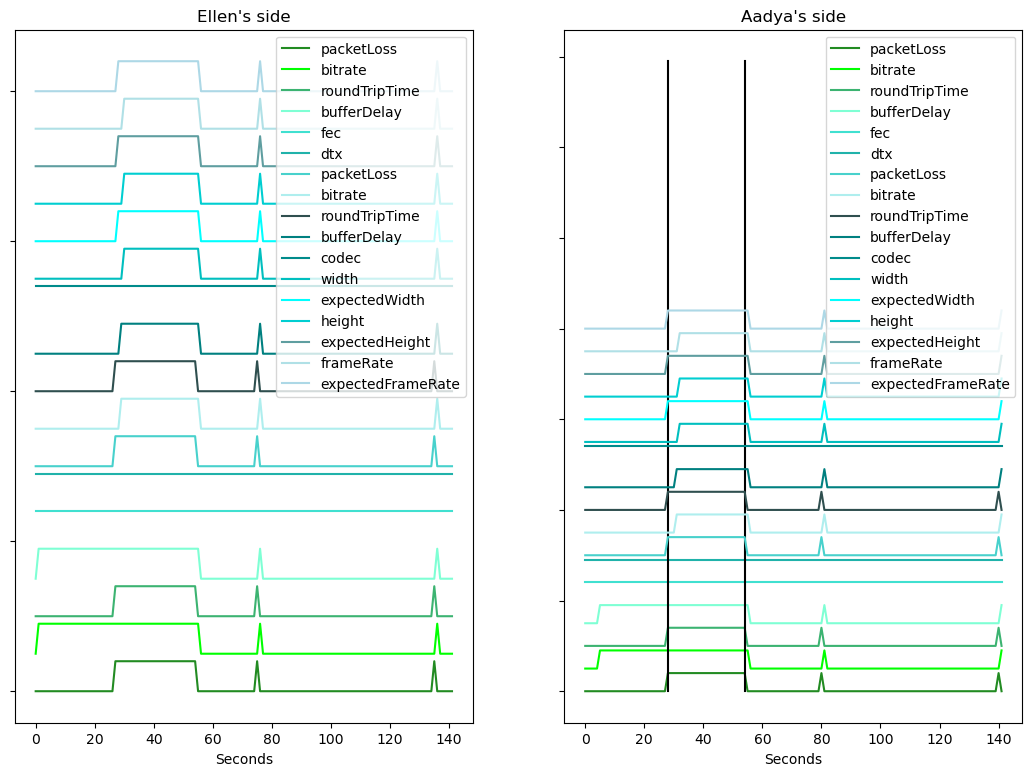

In [90]:
parent_file_path = '../CSVs/stage_one/treatment'
treatment_number = 1
audio_ellen, video_ellen, audio_aadya, video_aadya = read_in_relevant_data(parent_file_path, treatment_number)
print(find_non_null_timestamps(audio_aadya))
graph_crossover(audio_ellen, video_ellen, audio_aadya, video_aadya)

In [76]:
'''
Audio stats dictionary contains these params:

 * packetLoss: 0-100%
 * bitrate: bps
 * roundTripTime: ms
 * bufferDelay: ms
 * fec: boolean (ony used for audio)
 * dtx: boolean (ony used for audio)

Video stats dictionary contains these params:

 * packetLoss: 0-100%
 * bitrate: bps
 * roundTripTime: ms
 * bufferDelay: ms
 * codec: opus / vp8 / vp9 / h264 (only used for video) **EDIT THIS --> maybe add AV1 codec
 * width: number; Resolution of the video received
 * expectedWidth: number; Resolution of the rendering widget
 * height: number; Resolution of the video received
 * expectedHeight: number; Resolution of the rendering widget
 * frameRate: number; FrameRate of the video received
 * expectedFrameRate: number; FrameRate of the video source
'''


def clamp(val, minimum, maximum):
	if val >= minimum:
		if val <= maximum:
			return val
		else:
			return maximum
	else:
		return minimum
	

def score_audio(audio_stats):

	R0 = 100 #initial rating (starts at max 100)

	delay = 20 + audio_stats['bufferDelay'] + audio_stats['roundTripTime'] / 2

	PL = audio_stats['packetLoss'] #Packet Loss

	#Equiptment Impairment 
	if audio_stats['dtx']:
		EI = 8
	else:
		value = 55 - 4.6 * math.log(audio_stats['bitrate'])
		EI = clamp(value, 0, 30)
	
	#Packet Loss Robustness Factor
	if audio_stats['fec']:
		PLRF = 20
	else:
		PLRF = 10   
	
	PLI = EI + (100 - EI) * (PL / (PL + PLRF)) #Packet Loss Impairment 
	
	#Delay Impairment
	if delay > 150:
		DI = delay * 0.03 + (0.1 * (delay - 150))
	else:
		DI = delay * 0.03
		
	R = clamp(R0 - PLI - DI, 0, 100) #Rating
	
	MOS_raw = 1 + 0.035 * R + (R * (R - 60) * (100 - R) * 7) / 1000000 
	MOS = clamp(math.round(MOS_raw * 100) / 100, 1, 5) #MOS score bounded between 1-5 to 2 dp
	
	return MOS


def score_video(video_stats):
	pixels = video_stats['width'] * video_stats['height']
	
	#increased quality from codec used
	if (video_stats['codec'] == 'VP9') or (video_stats['codec'] == 'AV1'):
		codec_factor = 1.2
	else:
		codec_factor = 1.0
	
	delay = video_stats['bufferDelay'] + video_stats['roundTripTime'] / 2
	
	FR = video_stats['frameRate']
	if FR != 0:
		
		bPPPF = (codec_factor * video_stats['bitRate']) / pixels / FR
		
		base = clamp(0.56 * math.log(bPPPF) + 5.36, 1, 5)
		
		MOS_raw = base - 1.9 * math.log(video_stats['expectedFrameRate'] / FR) - delay * 0.002
		MOS = clamp(math.round(MOS_raw * 100) / 100, 1, 5) #MOS score bounded between 1-5 to 2 dp
	
	else:
		MOS = 1
	
	return MOS
		






